In [1]:
from keras.models import load_model
!pip install mtcnn
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

import numpy as np
from mtcnn.mtcnn import MTCNN
from numpy import asarray
#!pip install pycocotools
import io
import os
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt


# Simple python package to shut up Tensorflow warnings and logs.
!pip install silence_tensorflow
import silence_tensorflow.auto

2022-11-29 19:08:04.558915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 19:08:04.705932: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-29 19:08:04.705983: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-29 19:08:05.571771: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

0.1.0


In [ ]:
#set up folders for extracted faces and the corresponding captions 
# initialize COCO API for instance annotations
import os
dataDir = './'

image_folder = "extracted_eyes"

savedirimage = dataDir +  image_folder + "/"


if not os.path.exists(savedirimage):
	os.makedirs(savedirimage)

In [ ]:
# extract eyes from extracted_face_image
def extract_eyes_from_extratced_face(filename, index, required_size = (300,100),left_eye_corner = 20, right_eye_corner = 230):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    if len(results)>=1:
        left_right_eye_x_diff = results[0]['keypoints']['right_eye'][0] - results[0]['keypoints']['left_eye'][0] 
        left_right_eye_y_diff = abs(results[0]['keypoints']['right_eye'][1] - results[0]['keypoints']['left_eye'][1]) 
    else:
        return False
    # extract the bounding box from the first face
    if left_right_eye_x_diff>=100 and left_right_eye_y_diff < 8:
        #print(results[0])
        xeye = left_eye_corner
        yeye = int((results[0]['keypoints']['left_eye'][1]+results[0]['keypoints']['right_eye'][1])/2 -10)
        width = right_eye_corner
        height = int((yeye+results[0]['keypoints']['nose'][1])/2)
        eyes = pixels[yeye:height, xeye:width]
        # resize pixels to the model size
        image = Image.fromarray(eyes)
        image = image.resize(required_size)
        eyes_array = np.asarray(image)
        #plt.imshow(eyes_array)
        plt.imsave(os.path.join(savedirimage, 'eyes_img_{}.jpg'.format(index)),eyes_array)
        return True
    return False

In [ ]:
files = os.listdir('../extracted_faces_from_COCO/')

In [ ]:
len(files)

In [ ]:
index =0
for file in files:
    if extract_eyes_from_extratced_face(os.path.join('../extracted_faces_from_COCO/',file), index = index):
        print(index)
        index+=1

In [7]:
# extract eyes from extracted_face_image
def extract_eyes_from_extratced_face_GFW(filename, index, required_size = (300,100)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    if len(results)>=1:
        left_right_eye_x_diff = results[0]['keypoints']['right_eye'][0] - results[0]['keypoints']['left_eye'][0] 
        left_right_eye_y_diff = abs(results[0]['keypoints']['right_eye'][1] - results[0]['keypoints']['left_eye'][1]) 
    else:
        return False
    # extract the bounding box from the first face
    if left_right_eye_x_diff>=25 and left_right_eye_y_diff < 4:
        #print(results[0])
        try:
            xeye = 5
            yeye = int((results[0]['keypoints']['left_eye'][1]+results[0]['keypoints']['right_eye'][1])/2 -10)
            width = 95
            height = int((yeye+results[0]['keypoints']['nose'][1])/2)
            eyes = pixels[yeye:height, xeye:width]
            # resize pixels to the model size
            image = Image.fromarray(eyes)
            image = image.resize(required_size)
            eyes_array = np.asarray(image)
            #plt.imshow(eyes_array)
            plt.imsave(os.path.join(savedirimage, 'eyes_img_{}.jpg'.format(index)),eyes_array)
            return True
        except:
            None
    return False

In [8]:
#set up folders for extracted faces and the corresponding captions 
# initialize COCO API for instance annotations
import os
dataDir = './'

image_folder = "extracted_real_eyes_GFW"

savedirimage = dataDir +  image_folder + "/"


if not os.path.exists(savedirimage):
	os.makedirs(savedirimage)

In [9]:
files = os.listdir('GFW/real_faces/')

In [10]:
len(files)

30000

In [11]:
index =1001
for i in range(25000, len(files)):
    if extract_eyes_from_extratced_face_GFW(os.path.join('GFW/real_faces/',files[i]), index = index):
        print("------------" + str(i) + "-----------")
        index+=1

1/1 [==============================] - 0s 151ms/step
------------25002-----------
1/1 [==============================] - 0s 145ms/step
------------25009-----------
1/1 [==============================] - 0s 127ms/step
------------25012-----------
1/1 [==============================] - 0s 166ms/step
------------25016-----------
1/1 [==============================] - 0s 175ms/step
------------25019-----------
1/1 [==============================] - 0s 212ms/step
------------25020-----------
1/1 [==============================] - 0s 151ms/step
------------25021-----------
1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 143ms/step
------------25022-----------
1/1 [==============================] - 0s 129ms/step
------------25026-----------
1/1 [==============================] - 0s 135ms/step
------------25027-----------
1/1 [==============================] - 0s 167ms/step
------------25030-----------
1/1 [==============================] - 0s 127ms/step
------------25035-----------
1/1 [==============================] - 0s 122ms/step
------------25040-----------
1/1 [==============================] - 0s 170ms/step
------------25041-----------
1/1 [==============================] - 0s 169ms/step
------------25042-----------
1/1 [==============================] - 0s 140ms/step
------------25043-----------


1/1 [==============================] - 0s 145ms/step
------------25045-----------
1/1 [==============================] - 0s 137ms/step
------------25048-----------
1/1 [==============================] - 0s 140ms/step
------------25049-----------
1/1 [==============================] - 0s 153ms/step
------------25053-----------
1/1 [==============================] - 0s 133ms/step
------------25058-----------
1/1 [==============================] - 0s 132ms/step
------------25059-----------
1/1 [==============================] - 0s 134ms/step
------------25062-----------
1/1 [==============================] - 0s 175ms/step
------------25063-----------
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 140ms/step
------------25067-----------
1/1 [==============================] - 0s 147ms/step
------------25070-----------
1/1 [==============================] - 0s 189ms/step
------------25074-----------
1/1 [==============================] - 0s 158ms/step
------------25075-----------
1/1 [==============================] - 0s 138ms/step
------------25077-----------
1/1 [==============================] - 0s 131ms/step
------------25078-----------
1/1 [==============================] - 0s 138ms/step
------------25080-----------
1/1 [==============================] - 0s 134ms/step
------------25081-----------
1/1 [==============================] - 0s 182ms/step
------------25085-----------
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 132ms/step
------------25089-----------
1/1 [==============================] - 0s 131ms/step
------------25090-----------
1/1 [==============================] - 0s 132ms/step
------------25091-----------
1/1 [==============================] - 0s 148ms/step
------------25092-----------
1/1 [==============================] - 0s 164ms/step
------------25097-----------
1/1 [==============================] - 0s 162ms/step
------------25098-----------
1/1 [==============================] - 0s 152ms/step
------------25099-----------
1/1 [==============================] - 0s 140ms/step
------------25101-----------
1/1 [==============================] - 0s 170ms/step
------------25102-----------
1/1 [==============================] - 0s 131ms/step
------------25103-----------
1/1 [==============================] - 0s 128ms/step
------------25104-----------
1/1 [==============================] - 0s 157ms/step
------------25105-----------
1/1 [===========

1/1 [==============================] - 0s 153ms/step
------------25109-----------
1/1 [==============================] - 0s 136ms/step
------------25113-----------
1/1 [==============================] - 0s 132ms/step
------------25115-----------
1/1 [==============================] - 0s 129ms/step
------------25117-----------
1/1 [==============================] - 1s 713ms/step
------------25118-----------
1/1 [==============================] - 0s 180ms/step
------------25119-----------
1/1 [==============================] - 0s 195ms/step
------------25120-----------
1/1 [==============================] - 0s 146ms/step
------------25121-----------
1/1 [==============================] - 0s 136ms/step
------------25122-----------
1/1 [==============================] - 0s 128ms/step
------------25124-----------
1/1 [==============================] - 0s 135ms/step
------------25126-----------
1/1 [==============================] - 0s 125ms/step
------------25127-----------
1/1 [===========

1/1 [==============================] - 0s 151ms/step
------------25132-----------
1/1 [==============================] - 0s 140ms/step
------------25133-----------
1/1 [==============================] - 0s 134ms/step
------------25135-----------
1/1 [==============================] - 0s 143ms/step
------------25136-----------
1/1 [==============================] - 0s 128ms/step
------------25137-----------
1/1 [==============================] - 0s 126ms/step
------------25138-----------
1/1 [==============================] - 0s 159ms/step
------------25139-----------
1/1 [==============================] - 0s 187ms/step
------------25141-----------
1/1 [==============================] - 0s 153ms/step
------------25142-----------
1/1 [==============================] - 0s 152ms/step
------------25143-----------
1/1 [==============================] - 0s 141ms/step
------------25144-----------
1/1 [==============================] - 0s 135ms/step
------------25147-----------
1/1 [===========

1/1 [==============================] - 0s 136ms/step
------------25151-----------
1/1 [==============================] - 0s 175ms/step
------------25153-----------
1/1 [==============================] - 0s 153ms/step
------------25154-----------
1/1 [==============================] - 0s 131ms/step
------------25156-----------
1/1 [==============================] - 0s 133ms/step
------------25157-----------
1/1 [==============================] - 0s 127ms/step
------------25159-----------
1/1 [==============================] - 0s 125ms/step
------------25160-----------
1/1 [==============================] - 0s 145ms/step
------------25161-----------
1/1 [==============================] - 0s 145ms/step
------------25166-----------
1/1 [==============================] - 0s 130ms/step
------------25167-----------
1/1 [==============================] - 0s 139ms/step
------------25168-----------
1/1 [==============================] - 0s 134ms/step
------------25169-----------
1/1 [===========

1/1 [==============================] - 0s 163ms/step
------------25175-----------
1/1 [==============================] - 0s 143ms/step
------------25176-----------
1/1 [==============================] - 0s 138ms/step
------------25178-----------
1/1 [==============================] - 0s 130ms/step
------------25179-----------
1/1 [==============================] - 0s 129ms/step
------------25181-----------
1/1 [==============================] - 0s 137ms/step
------------25183-----------
1/1 [==============================] - 0s 170ms/step
------------25186-----------
1/1 [==============================] - 0s 159ms/step
------------25188-----------
1/1 [==============================] - 0s 140ms/step
------------25193-----------
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 160ms/step
------------25197-----------
1/1 [==============================] - 0s 151ms/step
------------25198-----------
1/1 [==============================] - 0s 133ms/step
------------25202-----------
1/1 [==============================] - 0s 121ms/step
------------25204-----------
1/1 [==============================] - 0s 127ms/step
------------25205-----------
1/1 [==============================] - 0s 171ms/step
------------25208-----------
1/1 [==============================] - 0s 152ms/step
------------25209-----------
1/1 [==============================] - 0s 162ms/step
------------25210-----------
1/1 [==============================] - 0s 132ms/step
------------25211-----------
1/1 [==============================] - 0s 139ms/step
------------25213-----------
1/1 [==============================] - 0s 126ms/step
------------25215-----------
1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 137ms/step
------------25216-----------
1/1 [==============================] - 0s 192ms/step
------------25218-----------
1/1 [==============================] - 0s 147ms/step
------------25221-----------
1/1 [==============================] - 0s 134ms/step
------------25222-----------
1/1 [==============================] - 0s 138ms/step
------------25224-----------
1/1 [==============================] - 0s 136ms/step
------------25226-----------
1/1 [==============================] - 0s 132ms/step
------------25228-----------
1/1 [==============================] - 0s 140ms/step
------------25229-----------
1/1 [==============================] - 0s 144ms/step
------------25233-----------
1/1 [==============================] - 0s 167ms/step
------------25234-----------
1/1 [==============================] - 0s 127ms/step
------------25236-----------
1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 126ms/step
------------25238-----------
1/1 [==============================] - 0s 141ms/step
------------25239-----------
1/1 [==============================] - 0s 146ms/step
------------25243-----------
1/1 [==============================] - 0s 137ms/step
------------25244-----------
1/1 [==============================] - 0s 146ms/step
------------25246-----------
1/1 [==============================] - 0s 124ms/step
------------25247-----------
1/1 [==============================] - 0s 131ms/step
------------25248-----------
1/1 [==============================] - 0s 124ms/step
------------25249-----------
1/1 [==============================] - 0s 144ms/step
------------25250-----------
1/1 [==============================] - 0s 125ms/step
------------25251-----------
1/1 [==============================] - 0s 157ms/step
------------25253-----------
1/1 [==============================] - 0s 131ms/step
------------25256-----------
1/1 [===========

1/1 [==============================] - 0s 130ms/step
------------25259-----------
1/1 [==============================] - 0s 127ms/step
------------25262-----------
1/1 [==============================] - 0s 153ms/step
------------25265-----------
1/1 [==============================] - 0s 124ms/step
------------25269-----------
1/1 [==============================] - 0s 123ms/step
------------25273-----------
1/1 [==============================] - 0s 205ms/step
------------25274-----------
1/1 [==============================] - 0s 127ms/step
------------25279-----------
1/1 [==============================] - 0s 128ms/step
------------25280-----------
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 129ms/step
------------25282-----------
1/1 [==============================] - 0s 124ms/step
------------25283-----------
1/1 [==============================] - 0s 128ms/step
------------25284-----------
1/1 [==============================] - 0s 152ms/step
------------25285-----------
1/1 [==============================] - 0s 211ms/step
------------25286-----------
1/1 [==============================] - 0s 172ms/step
------------25287-----------
1/1 [==============================] - 0s 136ms/step
------------25289-----------
1/1 [==============================] - 0s 130ms/step
------------25291-----------
1/1 [==============================] - 0s 126ms/step
------------25292-----------
1/1 [==============================] - 0s 128ms/step
------------25294-----------
1/1 [==============================] - 0s 129ms/step
------------25296-----------
1/1 [==============================] - 0s 146ms/step
------------25299-----------
1/1 [===========

1/1 [==============================] - 0s 156ms/step
------------25309-----------
1/1 [==============================] - 0s 163ms/step
------------25312-----------
1/1 [==============================] - 0s 153ms/step
------------25313-----------
1/1 [==============================] - 0s 130ms/step
------------25314-----------
1/1 [==============================] - 0s 134ms/step
------------25316-----------
1/1 [==============================] - 0s 178ms/step
------------25319-----------
1/1 [==============================] - 0s 156ms/step
------------25320-----------
1/1 [==============================] - 0s 162ms/step
------------25321-----------
1/1 [==============================] - 0s 146ms/step
------------25322-----------
1/1 [==============================] - 0s 130ms/step
------------25323-----------
1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 127ms/step
------------25326-----------
1/1 [==============================] - 0s 130ms/step
------------25328-----------
1/1 [==============================] - 0s 179ms/step
------------25330-----------
1/1 [==============================] - 0s 158ms/step
------------25331-----------
1/1 [==============================] - 0s 126ms/step
------------25339-----------
1/1 [==============================] - 0s 182ms/step
------------25341-----------
1/1 [==============================] - 0s 158ms/step
------------25342-----------
1/1 [==============================] - 0s 134ms/step
------------25345-----------


1/1 [==============================] - 0s 130ms/step
------------25349-----------
1/1 [==============================] - 0s 132ms/step
------------25350-----------
1/1 [==============================] - 0s 146ms/step
------------25351-----------
1/1 [==============================] - 0s 185ms/step
------------25352-----------
1/1 [==============================] - 0s 159ms/step
------------25354-----------
1/1 [==============================] - 0s 129ms/step
------------25358-----------
1/1 [==============================] - 0s 131ms/step
------------25359-----------
1/1 [==============================] - 0s 132ms/step
------------25362-----------
1/1 [==============================] - 0s 170ms/step
------------25363-----------
1/1 [==============================] - 0s 149ms/step
------------25364-----------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 132ms/step
------------25367-----------
1/1 [==============================] - 0s 130ms/step
------------25368-----------
1/1 [==============================] - 0s 137ms/step
------------25370-----------
1/1 [==============================] - 0s 139ms/step
------------25371-----------
1/1 [==============================] - 0s 153ms/step
------------25376-----------
1/1 [==============================] - 0s 132ms/step
------------25378-----------
1/1 [==============================] - 0s 124ms/step
------------25381-----------
1/1 [==============================] - 0s 152ms/step
------------25382-----------
1/1 [==============================] - 0s 128ms/step
------------25383-----------
1/1 [==============================] - 0s 125ms/step
------------25384-----------
1/1 [==============================] - 0s 156ms/step
------------25386-----------
1/1 [==============================] - 0s 159ms/step
------------25387-----------
1/1 [===========

1/1 [==============================] - 0s 135ms/step
------------25389-----------
1/1 [==============================] - 0s 134ms/step
------------25391-----------
1/1 [==============================] - 0s 121ms/step
------------25393-----------
1/1 [==============================] - 0s 126ms/step
------------25395-----------
1/1 [==============================] - 0s 123ms/step
------------25396-----------
1/1 [==============================] - 0s 166ms/step
------------25397-----------
1/1 [==============================] - 0s 149ms/step
------------25398-----------
1/1 [==============================] - 0s 144ms/step
------------25399-----------
1/1 [==============================] - 0s 141ms/step
------------25400-----------
1/1 [==============================] - 0s 126ms/step
------------25402-----------
1/1 [==============================] - 0s 123ms/step
------------25404-----------
1/1 [==============================] - 0s 120ms/step
------------25405-----------
1/1 [===========

1/1 [==============================] - 0s 137ms/step
------------25410-----------
1/1 [==============================] - 0s 125ms/step
------------25412-----------
1/1 [==============================] - 0s 125ms/step
------------25413-----------
1/1 [==============================] - 0s 124ms/step
------------25416-----------
1/1 [==============================] - 0s 169ms/step
------------25420-----------
1/1 [==============================] - 0s 131ms/step
------------25422-----------
1/1 [==============================] - 0s 138ms/step
------------25423-----------
1/1 [==============================] - 0s 125ms/step
------------25424-----------
1/1 [==============================] - 0s 126ms/step
------------25425-----------
1/1 [==============================] - 0s 127ms/step
------------25426-----------
1/1 [==============================] - 0s 126ms/step
------------25427-----------
1/1 [==============================] - 0s 170ms/step
------------25430-----------
1/1 [===========

1/1 [==============================] - 0s 140ms/step
------------25432-----------
1/1 [==============================] - 0s 134ms/step
------------25433-----------
1/1 [==============================] - 0s 125ms/step
------------25436-----------
1/1 [==============================] - 0s 122ms/step
------------25438-----------
1/1 [==============================] - 0s 170ms/step
------------25441-----------
1/1 [==============================] - 0s 148ms/step
------------25443-----------
1/1 [==============================] - 0s 186ms/step
------------25444-----------
1/1 [==============================] - 0s 127ms/step
------------25445-----------
1/1 [==============================] - 0s 125ms/step
------------25446-----------
1/1 [==============================] - 0s 123ms/step
------------25448-----------
1/1 [==============================] - 0s 124ms/step
------------25449-----------
1/1 [==============================] - 0s 166ms/step
------------25452-----------
1/1 [===========

1/1 [==============================] - 0s 165ms/step
------------25453-----------
1/1 [==============================] - 0s 148ms/step
------------25454-----------
1/1 [==============================] - 0s 139ms/step
------------25455-----------
1/1 [==============================] - 0s 126ms/step
------------25458-----------
1/1 [==============================] - 0s 120ms/step
------------25461-----------
1/1 [==============================] - 0s 123ms/step
------------25462-----------
1/1 [==============================] - 0s 150ms/step
------------25464-----------
1/1 [==============================] - 0s 146ms/step
------------25465-----------
1/1 [==============================] - 0s 138ms/step
------------25467-----------
1/1 [==============================] - 0s 125ms/step
------------25469-----------
1/1 [==============================] - 0s 124ms/step
------------25470-----------
1/1 [==============================] - 0s 133ms/step
------------25471-----------
1/1 [===========

1/1 [==============================] - 0s 143ms/step
------------25477-----------
1/1 [==============================] - 0s 130ms/step
------------25478-----------
1/1 [==============================] - 0s 134ms/step
------------25479-----------
1/1 [==============================] - 0s 126ms/step
------------25480-----------
1/1 [==============================] - 0s 137ms/step
------------25482-----------
1/1 [==============================] - 0s 123ms/step
------------25484-----------
1/1 [==============================] - 0s 123ms/step
------------25485-----------
1/1 [==============================] - 0s 169ms/step
------------25486-----------
1/1 [==============================] - 0s 150ms/step
------------25487-----------
1/1 [==============================] - 0s 145ms/step
------------25488-----------
1/1 [==============================] - 0s 126ms/step
------------25491-----------
1/1 [==============================] - 0s 122ms/step
------------25493-----------
1/1 [===========

1/1 [==============================] - 0s 124ms/step
------------25496-----------
1/1 [==============================] - 0s 151ms/step
------------25498-----------
1/1 [==============================] - 0s 143ms/step
------------25499-----------
1/1 [==============================] - 0s 134ms/step
------------25500-----------
1/1 [==============================] - 0s 127ms/step
------------25502-----------
1/1 [==============================] - 0s 123ms/step
------------25503-----------
1/1 [==============================] - 0s 120ms/step
------------25505-----------
1/1 [==============================] - 0s 123ms/step
------------25506-----------
1/1 [==============================] - 0s 121ms/step
------------25507-----------
1/1 [==============================] - 0s 151ms/step
------------25509-----------
1/1 [==============================] - 0s 124ms/step
------------25512-----------
1/1 [==============================] - 0s 130ms/step
------------25513-----------
1/1 [===========

1/1 [==============================] - 0s 122ms/step
------------25517-----------
1/1 [==============================] - 0s 158ms/step
------------25520-----------
1/1 [==============================] - 0s 143ms/step
------------25521-----------
1/1 [==============================] - 0s 143ms/step
------------25522-----------
1/1 [==============================] - 0s 129ms/step
------------25523-----------
1/1 [==============================] - 0s 127ms/step
------------25524-----------
1/1 [==============================] - 0s 123ms/step
------------25525-----------
1/1 [==============================] - 0s 120ms/step
------------25526-----------
1/1 [==============================] - 0s 125ms/step
------------25528-----------
1/1 [==============================] - 0s 168ms/step
------------25530-----------
1/1 [==============================] - 0s 153ms/step
------------25531-----------
1/1 [==============================] - 0s 131ms/step
------------25533-----------
1/1 [===========

1/1 [==============================] - 0s 123ms/step
------------25538-----------
1/1 [==============================] - 0s 128ms/step
------------25540-----------
1/1 [==============================] - 0s 153ms/step
------------25542-----------
1/1 [==============================] - 0s 142ms/step
------------25543-----------
1/1 [==============================] - 0s 124ms/step
------------25548-----------
1/1 [==============================] - 0s 126ms/step
------------25549-----------
1/1 [==============================] - 0s 123ms/step
------------25551-----------
1/1 [==============================] - 0s 185ms/step
------------25552-----------
1/1 [==============================] - 0s 136ms/step
------------25555-----------
1/1 [==============================] - 0s 125ms/step
------------25557-----------
1/1 [==============================] - 0s 139ms/step
------------25558-----------
1/1 [==============================] - 0s 120ms/step
------------25559-----------
1/1 [===========

1/1 [==============================] - 0s 155ms/step
------------25564-----------
1/1 [==============================] - 0s 135ms/step
------------25567-----------
1/1 [==============================] - 0s 132ms/step
------------25569-----------
1/1 [==============================] - 0s 125ms/step
------------25570-----------
1/1 [==============================] - 0s 120ms/step
------------25571-----------
1/1 [==============================] - 0s 147ms/step
------------25576-----------
1/1 [==============================] - 0s 133ms/step
------------25578-----------
1/1 [==============================] - 0s 124ms/step
------------25579-----------
1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 124ms/step
------------25582-----------
1/1 [==============================] - 0s 125ms/step
------------25584-----------
1/1 [==============================] - 0s 121ms/step
------------25585-----------
1/1 [==============================] - 0s 169ms/step
------------25586-----------
1/1 [==============================] - 0s 122ms/step
------------25593-----------
1/1 [==============================] - 0s 122ms/step
------------25596-----------
1/1 [==============================] - 0s 133ms/step
------------25600-----------
1/1 [==============================] - 0s 130ms/step
------------25601-----------
1/1 [==============================] - 0s 128ms/step
------------25602-----------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 158ms/step
------------25609-----------
1/1 [==============================] - 0s 141ms/step
------------25610-----------
1/1 [==============================] - 0s 132ms/step
------------25612-----------
1/1 [==============================] - 0s 123ms/step
------------25614-----------
1/1 [==============================] - 0s 122ms/step
------------25616-----------
1/1 [==============================] - 0s 175ms/step
------------25619-----------
1/1 [==============================] - 0s 143ms/step
------------25622-----------
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 144ms/step
------------25626-----------
1/1 [==============================] - 0s 141ms/step
------------25633-----------
1/1 [==============================] - 0s 138ms/step
------------25634-----------
1/1 [==============================] - 0s 129ms/step
------------25641-----------
1/1 [==============================] - 0s 148ms/step
------------25643-----------
1/1 [==============================] - 0s 133ms/step
------------25645-----------
1/1 [==============================] - 0s 131ms/step
------------25646-----------
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 125ms/step
------------25647-----------
1/1 [==============================] - 0s 124ms/step
------------25648-----------
1/1 [==============================] - 0s 126ms/step
------------25649-----------
1/1 [==============================] - 0s 120ms/step
------------25650-----------
1/1 [==============================] - 0s 175ms/step
------------25653-----------
1/1 [==============================] - 0s 151ms/step
------------25654-----------
1/1 [==============================] - 0s 134ms/step
------------25659-----------
1/1 [==============================] - 0s 132ms/step
------------25663-----------
1/1 [==============================] - 0s 175ms/step
------------25664-----------
1/1 [==============================] - 0s 163ms/step
------------25665-----------
1/1 [==============================] - 0s 145ms/step
------------25666-----------
1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 126ms/step
------------25671-----------
1/1 [==============================] - 0s 126ms/step
------------25674-----------
1/1 [==============================] - 0s 123ms/step
------------25675-----------
1/1 [==============================] - 0s 151ms/step
------------25677-----------
1/1 [==============================] - 0s 140ms/step
------------25678-----------
1/1 [==============================] - 0s 126ms/step
------------25681-----------
1/1 [==============================] - 0s 124ms/step
------------25683-----------
1/1 [==============================] - 0s 124ms/step
------------25684-----------
1/1 [==============================] - 0s 125ms/step
------------25685-----------
1/1 [==============================] - 0s 121ms/step
------------25686-----------
1/1 [==============================] - 0s 169ms/step
------------25687-----------
1/1 [==============================] - 0s 152ms/step
------------25688-----------
1/1 [===========

1/1 [==============================] - 0s 129ms/step
------------25690-----------
1/1 [==============================] - 0s 127ms/step
------------25692-----------
1/1 [==============================] - 0s 123ms/step
------------25694-----------
1/1 [==============================] - 0s 122ms/step
------------25696-----------
1/1 [==============================] - 0s 168ms/step
------------25698-----------
1/1 [==============================] - 0s 157ms/step
------------25699-----------
1/1 [==============================] - 0s 145ms/step
------------25700-----------
1/1 [==============================] - 0s 129ms/step
------------25701-----------
1/1 [==============================] - 0s 127ms/step
------------25703-----------
1/1 [==============================] - 0s 126ms/step
------------25704-----------
1/1 [==============================] - 0s 129ms/step
------------25705-----------
1/1 [==============================] - 0s 121ms/step
------------25706-----------
1/1 [===========

1/1 [==============================] - 0s 147ms/step
------------25711-----------
1/1 [==============================] - 0s 132ms/step
------------25712-----------
1/1 [==============================] - 0s 125ms/step
------------25715-----------
1/1 [==============================] - 0s 124ms/step
------------25716-----------
1/1 [==============================] - 0s 123ms/step
------------25717-----------
1/1 [==============================] - 0s 127ms/step
------------25719-----------
1/1 [==============================] - 0s 149ms/step
------------25721-----------
1/1 [==============================] - 0s 123ms/step
------------25727-----------
1/1 [==============================] - 0s 127ms/step
------------25728-----------
1/1 [==============================] - 0s 125ms/step
------------25729-----------
1/1 [==============================] - 0s 172ms/step
------------25731-----------
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 142ms/step
------------25733-----------
1/1 [==============================] - 0s 124ms/step
------------25736-----------
1/1 [==============================] - 0s 121ms/step
------------25741-----------
1/1 [==============================] - 0s 170ms/step
------------25743-----------
1/1 [==============================] - 0s 132ms/step
------------25746-----------
1/1 [==============================] - 0s 128ms/step
------------25749-----------
1/1 [==============================] - 0s 125ms/step
------------25750-----------
1/1 [==============================] - 0s 123ms/step
------------25752-----------
1/1 [==============================] - 0s 122ms/step
------------25753-----------
1/1 [==============================] - 0s 169ms/step
------------25754-----------


1/1 [==============================] - 0s 149ms/step
------------25755-----------
1/1 [==============================] - 0s 143ms/step
------------25756-----------
1/1 [==============================] - 0s 129ms/step
------------25758-----------
1/1 [==============================] - 0s 130ms/step
------------25759-----------
1/1 [==============================] - 0s 124ms/step
------------25762-----------
1/1 [==============================] - 0s 171ms/step
------------25765-----------
1/1 [==============================] - 0s 126ms/step
------------25770-----------
1/1 [==============================] - 0s 125ms/step
------------25772-----------
1/1 [==============================] - 0s 120ms/step
------------25774-----------
1/1 [==============================] - 0s 124ms/step
------------25775-----------
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 150ms/step
------------25777-----------
1/1 [==============================] - 0s 136ms/step
------------25779-----------
1/1 [==============================] - 0s 130ms/step
------------25780-----------
1/1 [==============================] - 0s 124ms/step
------------25781-----------
1/1 [==============================] - 0s 135ms/step
------------25783-----------
1/1 [==============================] - 0s 133ms/step
------------25786-----------
1/1 [==============================] - 0s 142ms/step
------------25790-----------
1/1 [==============================] - 0s 135ms/step
------------25791-----------
1/1 [==============================] - 0s 157ms/step
------------25792-----------
1/1 [==============================] - 0s 123ms/step
------------25793-----------
1/1 [==============================] - 0s 129ms/step
------------25796-----------
1/1 [==============================] - 0s 125ms/step
------------25797-----------
1/1 [===========

1/1 [==============================] - 0s 179ms/step
------------25798-----------
1/1 [==============================] - 0s 154ms/step
------------25799-----------
1/1 [==============================] - 0s 142ms/step
------------25801-----------
1/1 [==============================] - 0s 131ms/step
------------25802-----------
1/1 [==============================] - 0s 129ms/step
------------25803-----------
1/1 [==============================] - 0s 133ms/step
------------25804-----------
1/1 [==============================] - 0s 122ms/step
------------25806-----------
1/1 [==============================] - 0s 131ms/step
------------25807-----------
1/1 [==============================] - 0s 128ms/step
------------25808-----------
1/1 [==============================] - 0s 180ms/step
------------25809-----------
1/1 [==============================] - 0s 150ms/step
------------25811-----------
1/1 [==============================] - 0s 123ms/step
------------25817-----------
1/1 [===========

------------25819-----------
1/1 [==============================] - 0s 156ms/step
------------25821-----------
1/1 [==============================] - 0s 147ms/step
------------25822-----------
1/1 [==============================] - 0s 128ms/step
------------25824-----------
1/1 [==============================] - 0s 125ms/step
------------25826-----------
1/1 [==============================] - 0s 123ms/step
------------25828-----------
1/1 [==============================] - 0s 125ms/step
------------25831-----------
1/1 [==============================] - 0s 139ms/step
------------25834-----------
1/1 [==============================] - 0s 129ms/step
------------25836-----------
1/1 [==============================] - 0s 122ms/step
------------25837-----------
1/1 [==============================] - 0s 123ms/step
------------25838-----------
1/1 [==============================] - 0s 123ms/step
------------25840-----------
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 128ms/step
------------25841-----------
1/1 [==============================] - 0s 129ms/step
------------25842-----------
1/1 [==============================] - 0s 170ms/step
------------25843-----------
1/1 [==============================] - 0s 149ms/step
------------25845-----------
1/1 [==============================] - 0s 133ms/step
------------25846-----------
1/1 [==============================] - 0s 133ms/step
------------25847-----------
1/1 [==============================] - 0s 123ms/step
------------25849-----------
1/1 [==============================] - 0s 126ms/step
------------25850-----------
1/1 [==============================] - 0s 127ms/step
------------25851-----------
1/1 [==============================] - 0s 123ms/step
------------25852-----------
1/1 [==============================] - 0s 145ms/step
------------25853-----------
1/1 [==============================] - 0s 133ms/step
------------25857-----------
1/1 [===========

1/1 [==============================] - 0s 124ms/step
------------25863-----------
1/1 [==============================] - 0s 150ms/step
------------25867-----------
1/1 [==============================] - 0s 132ms/step
------------25868-----------
1/1 [==============================] - 0s 128ms/step
------------25869-----------
1/1 [==============================] - 0s 130ms/step
------------25870-----------
1/1 [==============================] - 0s 125ms/step
------------25872-----------
1/1 [==============================] - 0s 122ms/step
------------25874-----------
1/1 [==============================] - 0s 136ms/step
------------25875-----------
1/1 [==============================] - 0s 135ms/step
------------25879-----------
1/1 [==============================] - 0s 126ms/step
------------25881-----------
1/1 [==============================] - 0s 131ms/step
------------25882-----------
1/1 [==============================] - 0s 125ms/step
------------25883-----------


1/1 [==============================] - 0s 122ms/step
------------25884-----------
1/1 [==============================] - 0s 127ms/step
------------25886-----------
1/1 [==============================] - 0s 182ms/step
------------25887-----------
1/1 [==============================] - 0s 145ms/step
------------25889-----------
1/1 [==============================] - 0s 127ms/step
------------25894-----------
1/1 [==============================] - 0s 120ms/step
------------25895-----------
1/1 [==============================] - 0s 123ms/step
------------25896-----------
1/1 [==============================] - 0s 125ms/step
------------25897-----------
1/1 [==============================] - 0s 137ms/step
------------25901-----------
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 124ms/step
------------25906-----------
1/1 [==============================] - 0s 159ms/step
------------25910-----------
1/1 [==============================] - 0s 139ms/step
------------25912-----------
1/1 [==============================] - 0s 122ms/step
------------25915-----------
1/1 [==============================] - 0s 125ms/step
------------25916-----------
1/1 [==============================] - 0s 132ms/step
------------25917-----------
1/1 [==============================] - 0s 133ms/step
------------25918-----------
1/1 [==============================] - 0s 184ms/step
------------25920-----------
1/1 [==============================] - 0s 172ms/step
------------25921-----------
1/1 [==============================] - 0s 152ms/step
------------25923-----------
1/1 [==============================] - 0s 134ms/step
------------25925-----------
1/1 [==============================] - 0s 125ms/step
------------25926-----------


1/1 [==============================] - 0s 125ms/step
------------25927-----------
1/1 [==============================] - 0s 128ms/step
------------25928-----------
1/1 [==============================] - 0s 122ms/step
------------25929-----------
1/1 [==============================] - 0s 124ms/step
------------25930-----------
1/1 [==============================] - 1s 558ms/step
------------25931-----------
1/1 [==============================] - 0s 167ms/step
------------25932-----------
1/1 [==============================] - 0s 131ms/step
------------25935-----------
1/1 [==============================] - 0s 133ms/step
------------25936-----------
1/1 [==============================] - 0s 126ms/step
------------25938-----------
1/1 [==============================] - 0s 173ms/step
------------25943-----------
1/1 [==============================] - 0s 153ms/step
------------25944-----------
1/1 [==============================] - 0s 150ms/step
------------25946-----------
1/1 [===========

1/1 [==============================] - 0s 122ms/step
------------25950-----------
1/1 [==============================] - 0s 120ms/step
------------25951-----------
1/1 [==============================] - 0s 120ms/step
------------25952-----------
1/1 [==============================] - 0s 125ms/step
------------25953-----------
1/1 [==============================] - 0s 147ms/step
------------25955-----------
1/1 [==============================] - 0s 129ms/step
------------25958-----------
1/1 [==============================] - 0s 122ms/step
------------25961-----------
1/1 [==============================] - 0s 123ms/step
------------25962-----------
1/1 [==============================] - 0s 122ms/step
------------25963-----------
1/1 [==============================] - 0s 127ms/step
------------25964-----------
1/1 [==============================] - 0s 171ms/step
------------25965-----------
1/1 [==============================] - 0s 142ms/step
------------25967-----------
1/1 [===========

1/1 [==============================] - 0s 126ms/step
------------25970-----------
1/1 [==============================] - 0s 124ms/step
------------25971-----------
1/1 [==============================] - 0s 169ms/step
------------25976-----------
1/1 [==============================] - 0s 146ms/step
------------25978-----------
1/1 [==============================] - 0s 138ms/step
------------25979-----------
1/1 [==============================] - 0s 131ms/step
------------25980-----------
1/1 [==============================] - 0s 129ms/step
------------25982-----------
1/1 [==============================] - 0s 126ms/step
------------25983-----------
1/1 [==============================] - 0s 125ms/step
------------25984-----------
1/1 [==============================] - 0s 121ms/step
------------25985-----------
1/1 [==============================] - 0s 169ms/step
------------25987-----------
1/1 [==============================] - 0s 154ms/step
------------25988-----------
1/1 [===========

1/1 [==============================] - 0s 138ms/step
------------25990-----------
1/1 [==============================] - 0s 129ms/step
------------25991-----------
1/1 [==============================] - 0s 151ms/step
------------25999-----------
1/1 [==============================] - 0s 126ms/step
------------26002-----------
1/1 [==============================] - 0s 126ms/step
------------26004-----------
1/1 [==============================] - 0s 124ms/step
------------26008-----------
1/1 [==============================] - 0s 165ms/step
------------26009-----------
1/1 [==============================] - 0s 149ms/step
------------26010-----------
1/1 [==============================] - 0s 143ms/step
------------26011-----------
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 125ms/step
------------26014-----------
1/1 [==============================] - 0s 125ms/step
------------26015-----------
1/1 [==============================] - 0s 121ms/step
------------26017-----------
1/1 [==============================] - 0s 168ms/step
------------26020-----------
1/1 [==============================] - 0s 157ms/step
------------26021-----------
1/1 [==============================] - 0s 140ms/step
------------26022-----------
1/1 [==============================] - 0s 123ms/step
------------26028-----------
1/1 [==============================] - 0s 122ms/step
------------26029-----------
1/1 [==============================] - 0s 125ms/step
------------26030-----------
1/1 [==============================] - 0s 176ms/step
------------26031-----------
1/1 [==============================] - 0s 138ms/step
------------26033-----------


1/1 [==============================] - 0s 132ms/step
------------26035-----------
1/1 [==============================] - 0s 127ms/step
------------26036-----------
1/1 [==============================] - 0s 123ms/step
------------26038-----------
1/1 [==============================] - 0s 121ms/step
------------26040-----------
1/1 [==============================] - 0s 123ms/step
------------26041-----------
1/1 [==============================] - 0s 138ms/step
------------26045-----------
1/1 [==============================] - 0s 125ms/step
------------26048-----------
1/1 [==============================] - 0s 125ms/step
------------26049-----------
1/1 [==============================] - 0s 125ms/step
------------26050-----------
1/1 [==============================] - 0s 119ms/step
------------26052-----------
1/1 [==============================] - 0s 189ms/step
------------26053-----------
1/1 [==============================] - 0s 152ms/step
------------26054-----------
1/1 [===========

1/1 [==============================] - 0s 130ms/step
------------26057-----------
1/1 [==============================] - 0s 145ms/step
------------26066-----------
1/1 [==============================] - 0s 130ms/step
------------26068-----------
1/1 [==============================] - 0s 124ms/step
------------26069-----------
1/1 [==============================] - 0s 126ms/step
------------26070-----------
1/1 [==============================] - 0s 123ms/step
------------26072-----------
1/1 [==============================] - 0s 161ms/step
------------26076-----------
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 120ms/step
------------26083-----------
1/1 [==============================] - 0s 123ms/step
------------26085-----------
1/1 [==============================] - 0s 174ms/step
------------26086-----------
1/1 [==============================] - 0s 154ms/step
------------26088-----------
1/1 [==============================] - 0s 129ms/step
------------26090-----------
1/1 [==============================] - 0s 123ms/step
------------26092-----------
1/1 [==============================] - 0s 123ms/step
------------26094-----------
1/1 [==============================] - 0s 183ms/step
------------26098-----------
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 157ms/step
------------26100-----------
1/1 [==============================] - 0s 144ms/step
------------26101-----------
1/1 [==============================] - 0s 140ms/step
------------26103-----------
1/1 [==============================] - 0s 134ms/step
------------26106-----------
1/1 [==============================] - 0s 130ms/step
------------26113-----------
1/1 [==============================] - 0s 127ms/step
------------26114-----------
1/1 [==============================] - 0s 123ms/step
------------26115-----------
1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 152ms/step
------------26121-----------
1/1 [==============================] - 0s 134ms/step
------------26123-----------
1/1 [==============================] - 0s 130ms/step
------------26124-----------
1/1 [==============================] - 0s 130ms/step
------------26125-----------
1/1 [==============================] - 0s 131ms/step
------------26128-----------
1/1 [==============================] - 0s 132ms/step
------------26129-----------
1/1 [==============================] - 0s 158ms/step
------------26132-----------
1/1 [==============================] - 0s 148ms/step
------------26133-----------
1/1 [==============================] - 0s 124ms/step
------------26136-----------
1/1 [==============================] - 0s 126ms/step
------------26138-----------
1/1 [==============================] - 0s 122ms/step
------------26140-----------
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 139ms/step
------------26144-----------
1/1 [==============================] - 0s 132ms/step
------------26146-----------
1/1 [==============================] - 0s 126ms/step
------------26149-----------
1/1 [==============================] - 0s 121ms/step
------------26150-----------
1/1 [==============================] - 0s 122ms/step
------------26151-----------
1/1 [==============================] - 0s 129ms/step
------------26152-----------
1/1 [==============================] - 0s 150ms/step
------------26154-----------
1/1 [==============================] - 0s 127ms/step
------------26158-----------
1/1 [==============================] - 0s 125ms/step
------------26159-----------
1/1 [==============================] - 0s 129ms/step
------------26163-----------
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 156ms/step
------------26165-----------
1/1 [==============================] - 0s 129ms/step
------------26168-----------
1/1 [==============================] - 0s 119ms/step
------------26172-----------
1/1 [==============================] - 0s 121ms/step
------------26173-----------
1/1 [==============================] - 0s 122ms/step
------------26174-----------
1/1 [==============================] - 0s 124ms/step
------------26175-----------
1/1 [==============================] - 0s 169ms/step
------------26176-----------
1/1 [==============================] - 0s 149ms/step
------------26177-----------
1/1 [==============================] - 0s 143ms/step
------------26178-----------
1/1 [==============================] - 0s 124ms/step
------------26184-----------
1/1 [==============================] - 0s 121ms/step
------------26185-----------


1/1 [==============================] - 0s 143ms/step
------------26189-----------
1/1 [==============================] - 0s 124ms/step
------------26193-----------
1/1 [==============================] - 0s 121ms/step
------------26195-----------
1/1 [==============================] - 0s 121ms/step
------------26196-----------
1/1 [==============================] - 0s 124ms/step
------------26197-----------
1/1 [==============================] - 0s 133ms/step
------------26202-----------
1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 125ms/step
------------26208-----------
1/1 [==============================] - 0s 165ms/step
------------26209-----------
1/1 [==============================] - 0s 149ms/step
------------26210-----------
1/1 [==============================] - 0s 142ms/step
------------26211-----------
1/1 [==============================] - 0s 122ms/step
------------26217-----------
1/1 [==============================] - 0s 124ms/step
------------26218-----------
1/1 [==============================] - 0s 127ms/step
------------26219-----------
1/1 [==============================] - 0s 133ms/step
------------26223-----------
1/1 [==============================] - 0s 123ms/step
------------26227-----------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 128ms/step
------------26234-----------
1/1 [==============================] - 0s 121ms/step
------------26240-----------
1/1 [==============================] - 0s 124ms/step
------------26241-----------
1/1 [==============================] - 0s 179ms/step
------------26242-----------
1/1 [==============================] - 0s 144ms/step
------------26244-----------
1/1 [==============================] - 0s 144ms/step
------------26245-----------
1/1 [==============================] - 0s 126ms/step
------------26246-----------
1/1 [==============================] - 0s 126ms/step
------------26247-----------
1/1 [==============================] - 0s 132ms/step
------------26250-----------
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 153ms/step
------------26255-----------
1/1 [==============================] - 0s 143ms/step
------------26257-----------
1/1 [==============================] - 0s 131ms/step
------------26258-----------
1/1 [==============================] - 0s 129ms/step
------------26259-----------
1/1 [==============================] - 0s 130ms/step
------------26260-----------
1/1 [==============================] - 0s 126ms/step
------------26261-----------
1/1 [==============================] - 0s 125ms/step
------------26264-----------
1/1 [==============================] - 0s 183ms/step
------------26265-----------
1/1 [==============================] - 0s 142ms/step
------------26268-----------
1/1 [==============================] - 0s 128ms/step
------------26270-----------
1/1 [==============================] - 0s 124ms/step
------------26271-----------
1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 151ms/step
------------26273-----------
1/1 [==============================] - 0s 134ms/step
------------26274-----------
1/1 [==============================] - 0s 148ms/step
------------26278-----------
1/1 [==============================] - 0s 140ms/step
------------26279-----------
1/1 [==============================] - 0s 126ms/step
------------26282-----------
1/1 [==============================] - 0s 128ms/step
------------26284-----------
1/1 [==============================] - 0s 152ms/step
------------26286-----------
1/1 [==============================] - 0s 149ms/step
------------26289-----------
1/1 [==============================] - 0s 137ms/step
------------26290-----------
1/1 [==============================] - 0s 130ms/step
------------26291-----------
1/1 [==============================] - 0s 128ms/step
------------26293-----------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 124ms/step
------------26294-----------
1/1 [==============================] - 0s 125ms/step
------------26295-----------
1/1 [==============================] - 0s 123ms/step
------------26297-----------
1/1 [==============================] - 0s 183ms/step
------------26298-----------
1/1 [==============================] - 0s 162ms/step
------------26299-----------
1/1 [==============================] - 0s 150ms/step
------------26300-----------
1/1 [==============================] - 0s 172ms/step
------------26301-----------
1/1 [==============================] - 0s 145ms/step
------------26302-----------
1/1 [==============================] - 0s 128ms/step
------------26303-----------
1/1 [==============================] - 0s 128ms/step
------------26304-----------
1/1 [==============================] - 0s 201ms/step
------------26309-----------
1/1 [==============================] - 0s 155ms/step
------------26311-----------
1/1 [===========

1/1 [==============================] - 0s 127ms/step
------------26318-----------
1/1 [==============================] - 0s 124ms/step
------------26320-----------
1/1 [==============================] - 0s 172ms/step
------------26321-----------
1/1 [==============================] - 0s 153ms/step
------------26322-----------
1/1 [==============================] - 0s 149ms/step
------------26323-----------
1/1 [==============================] - 0s 133ms/step
------------26326-----------
1/1 [==============================] - 0s 124ms/step
------------26327-----------
1/1 [==============================] - 0s 132ms/step
------------26329-----------
1/1 [==============================] - 0s 122ms/step
------------26330-----------
1/1 [==============================] - 0s 120ms/step
------------26331-----------
1/1 [==============================] - 0s 157ms/step
------------26333-----------
1/1 [==============================] - 0s 133ms/step
------------26336-----------
1/1 [===========

1/1 [==============================] - 0s 127ms/step
------------26337-----------
1/1 [==============================] - 0s 123ms/step
------------26340-----------
1/1 [==============================] - 0s 132ms/step
------------26341-----------
1/1 [==============================] - 0s 126ms/step
------------26342-----------
1/1 [==============================] - 0s 176ms/step
------------26343-----------
1/1 [==============================] - 0s 157ms/step
------------26344-----------
1/1 [==============================] - 0s 129ms/step
------------26347-----------
1/1 [==============================] - 0s 131ms/step
------------26352-----------
1/1 [==============================] - 0s 155ms/step
------------26355-----------
1/1 [==============================] - 0s 135ms/step


1/1 [==============================] - 0s 128ms/step
------------26359-----------
1/1 [==============================] - 0s 125ms/step
------------26360-----------
1/1 [==============================] - 0s 123ms/step
------------26362-----------
1/1 [==============================] - 0s 172ms/step
------------26365-----------
1/1 [==============================] - 0s 145ms/step
------------26367-----------
1/1 [==============================] - 0s 128ms/step
------------26371-----------
1/1 [==============================] - 0s 126ms/step
------------26373-----------
1/1 [==============================] - 0s 130ms/step
------------26374-----------
1/1 [==============================] - 0s 178ms/step
------------26376-----------
1/1 [==============================] - 0s 147ms/step
------------26378-----------
1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 129ms/step
------------26381-----------
1/1 [==============================] - 0s 125ms/step
------------26386-----------
1/1 [==============================] - 0s 175ms/step
------------26387-----------
1/1 [==============================] - 0s 159ms/step
------------26389-----------
1/1 [==============================] - 0s 136ms/step
------------26392-----------
1/1 [==============================] - 0s 134ms/step
------------26393-----------
1/1 [==============================] - 0s 133ms/step
------------26395-----------
1/1 [==============================] - 0s 124ms/step
------------26397-----------
1/1 [==============================] - 0s 161ms/step
------------26399-----------
1/1 [==============================] - 0s 148ms/step
------------26400-----------
1/1 [==============================] - 0s 139ms/step
------------26401-----------
1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 152ms/step
------------26402-----------
1/1 [==============================] - 0s 133ms/step
------------26403-----------
1/1 [==============================] - 0s 132ms/step
------------26406-----------
1/1 [==============================] - 0s 160ms/step
------------26412-----------
1/1 [==============================] - 0s 169ms/step
------------26413-----------
1/1 [==============================] - 0s 130ms/step
------------26414-----------
1/1 [==============================] - 0s 158ms/step
------------26423-----------
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 140ms/step
------------26424-----------
1/1 [==============================] - 0s 127ms/step
------------26425-----------
1/1 [==============================] - 0s 127ms/step
------------26426-----------
1/1 [==============================] - 0s 122ms/step
------------26427-----------
1/1 [==============================] - 0s 121ms/step
------------26428-----------
1/1 [==============================] - 0s 122ms/step
------------26430-----------
1/1 [==============================] - 0s 128ms/step
------------26436-----------
1/1 [==============================] - 0s 127ms/step
------------26438-----------
1/1 [==============================] - 0s 139ms/step
------------26440-----------
1/1 [==============================] - 0s 194ms/step
------------26443-----------
1/1 [==============================] - 0s 156ms/step
------------26445-----------
1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 127ms/step
------------26448-----------
1/1 [==============================] - 0s 131ms/step
------------26452-----------
1/1 [==============================] - 0s 175ms/step
------------26454-----------
1/1 [==============================] - 0s 147ms/step
------------26456-----------
1/1 [==============================] - 0s 143ms/step
------------26457-----------
1/1 [==============================] - 0s 130ms/step
------------26459-----------
1/1 [==============================] - 0s 127ms/step
------------26461-----------
1/1 [==============================] - 0s 125ms/step
------------26463-----------
1/1 [==============================] - 0s 162ms/step
------------26466-----------
1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 125ms/step
------------26473-----------
1/1 [==============================] - 0s 122ms/step
------------26475-----------
1/1 [==============================] - 0s 121ms/step
------------26476-----------
1/1 [==============================] - 0s 174ms/step
------------26477-----------
1/1 [==============================] - 0s 150ms/step
------------26478-----------
1/1 [==============================] - 0s 146ms/step
------------26479-----------
1/1 [==============================] - 0s 135ms/step
------------26480-----------
1/1 [==============================] - 0s 125ms/step
------------26483-----------
1/1 [==============================] - 0s 122ms/step
------------26486-----------
1/1 [==============================] - 0s 179ms/step
------------26488-----------
1/1 [==============================] - 0s 127ms/step


1/1 [==============================] - 0s 153ms/step
------------26490-----------
1/1 [==============================] - 0s 130ms/step
------------26492-----------
1/1 [==============================] - 0s 125ms/step
------------26493-----------
1/1 [==============================] - 0s 127ms/step
------------26495-----------
1/1 [==============================] - 0s 130ms/step
------------26496-----------
1/1 [==============================] - 0s 153ms/step
------------26500-----------
1/1 [==============================] - 0s 123ms/step
------------26504-----------
1/1 [==============================] - 0s 128ms/step
------------26505-----------
1/1 [==============================] - 0s 122ms/step
------------26506-----------
1/1 [==============================] - 0s 130ms/step
------------26507-----------
1/1 [==============================] - 0s 132ms/step
------------26508-----------
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 154ms/step
------------26512-----------
1/1 [==============================] - 0s 137ms/step
------------26515-----------
1/1 [==============================] - 0s 128ms/step
------------26516-----------
1/1 [==============================] - 0s 136ms/step
------------26520-----------
1/1 [==============================] - 0s 172ms/step
------------26521-----------
1/1 [==============================] - 0s 157ms/step
------------26522-----------
1/1 [==============================] - 0s 151ms/step
------------26524-----------
1/1 [==============================] - 0s 139ms/step
------------26525-----------
1/1 [==============================] - 0s 144ms/step
------------26526-----------
1/1 [==============================] - 0s 142ms/step
------------26527-----------
1/1 [==============================] - 0s 144ms/step
------------26529-----------
1/1 [==============================] - 0s 179ms/step


1/1 [==============================] - 0s 143ms/step
------------26534-----------
1/1 [==============================] - 0s 136ms/step
------------26535-----------
1/1 [==============================] - 0s 127ms/step
------------26536-----------
1/1 [==============================] - 0s 123ms/step
------------26537-----------
1/1 [==============================] - 0s 123ms/step
------------26538-----------
1/1 [==============================] - 0s 122ms/step
------------26539-----------
1/1 [==============================] - 0s 125ms/step
------------26540-----------
1/1 [==============================] - 0s 124ms/step
------------26541-----------
1/1 [==============================] - 0s 123ms/step
------------26542-----------
1/1 [==============================] - 0s 187ms/step
------------26543-----------
1/1 [==============================] - 0s 154ms/step
------------26544-----------
1/1 [==============================] - 0s 128ms/step
------------26548-----------
1/1 [===========

1/1 [==============================] - 0s 157ms/step
------------26555-----------
1/1 [==============================] - 0s 132ms/step
------------26559-----------
1/1 [==============================] - 0s 125ms/step
------------26560-----------
1/1 [==============================] - 0s 127ms/step
------------26562-----------
1/1 [==============================] - 0s 125ms/step
------------26563-----------
1/1 [==============================] - 0s 124ms/step
------------26565-----------
1/1 [==============================] - 0s 145ms/step
------------26568-----------
1/1 [==============================] - 0s 137ms/step
------------26569-----------
1/1 [==============================] - 0s 129ms/step
------------26571-----------
1/1 [==============================] - 0s 125ms/step
------------26573-----------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 120ms/step
------------26576-----------
1/1 [==============================] - 0s 148ms/step
------------26579-----------
1/1 [==============================] - 0s 133ms/step
------------26581-----------
1/1 [==============================] - 0s 128ms/step
------------26582-----------
1/1 [==============================] - 0s 127ms/step
------------26583-----------
1/1 [==============================] - 0s 134ms/step
------------26586-----------
1/1 [==============================] - 0s 173ms/step
------------26588-----------
1/1 [==============================] - 0s 153ms/step
------------26589-----------
1/1 [==============================] - 0s 128ms/step
------------26596-----------
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 119ms/step
------------26597-----------
1/1 [==============================] - 0s 122ms/step
------------26598-----------
1/1 [==============================] - 0s 163ms/step
------------26600-----------
1/1 [==============================] - 0s 127ms/step
------------26604-----------
1/1 [==============================] - 0s 123ms/step
------------26605-----------
1/1 [==============================] - 0s 120ms/step
------------26606-----------
1/1 [==============================] - 0s 123ms/step
------------26607-----------
1/1 [==============================] - 0s 133ms/step
------------26609-----------
1/1 [==============================] - 0s 192ms/step
------------26610-----------
1/1 [==============================] - 0s 165ms/step
------------26611-----------
1/1 [==============================] - 0s 157ms/step
------------26613-----------
1/1 [==============================] - 0s 124ms/step
------------26617-----------
1/1 [===========

1/1 [==============================] - 0s 123ms/step
------------26619-----------
1/1 [==============================] - 0s 150ms/step
------------26620-----------
1/1 [==============================] - 0s 138ms/step
------------26625-----------
1/1 [==============================] - 0s 123ms/step
------------26630-----------
1/1 [==============================] - 0s 155ms/step
------------26634-----------
1/1 [==============================] - 0s 154ms/step
------------26635-----------
1/1 [==============================] - 0s 125ms/step
------------26638-----------
1/1 [==============================] - 0s 122ms/step
------------26639-----------
1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 124ms/step
------------26640-----------
1/1 [==============================] - 0s 120ms/step
------------26641-----------
1/1 [==============================] - 0s 125ms/step
------------26642-----------
1/1 [==============================] - 0s 152ms/step
------------26645-----------
1/1 [==============================] - 0s 123ms/step
------------26649-----------
1/1 [==============================] - 0s 123ms/step
------------26650-----------
1/1 [==============================] - 0s 125ms/step
------------26652-----------
1/1 [==============================] - 0s 126ms/step
------------26653-----------
1/1 [==============================] - 0s 159ms/step
------------26656-----------
1/1 [==============================] - 0s 141ms/step
------------26658-----------
1/1 [==============================] - 0s 145ms/step
------------26659-----------
1/1 [==============================] - 0s 148ms/step
------------26660-----------
1/1 [===========

1/1 [==============================] - 0s 159ms/step
------------26662-----------
1/1 [==============================] - 0s 126ms/step
------------26663-----------
1/1 [==============================] - 0s 128ms/step
------------26665-----------
1/1 [==============================] - 0s 176ms/step
------------26666-----------
1/1 [==============================] - 0s 163ms/step
------------26668-----------
1/1 [==============================] - 0s 136ms/step
------------26671-----------
1/1 [==============================] - 0s 139ms/step
------------26674-----------
1/1 [==============================] - 0s 135ms/step
------------26680-----------
1/1 [==============================] - 0s 123ms/step


------------26683-----------
1/1 [==============================] - 0s 132ms/step
------------26686-----------
1/1 [==============================] - 0s 131ms/step
------------26687-----------
1/1 [==============================] - 0s 187ms/step
------------26688-----------
1/1 [==============================] - 0s 168ms/step
------------26689-----------
1/1 [==============================] - 0s 140ms/step
------------26690-----------
1/1 [==============================] - 0s 136ms/step
------------26691-----------
1/1 [==============================] - 0s 154ms/step
------------26693-----------
1/1 [==============================] - 0s 128ms/step
------------26694-----------
1/1 [==============================] - 0s 119ms/step
------------26698-----------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 120ms/step
------------26707-----------
1/1 [==============================] - 0s 122ms/step
------------26708-----------
1/1 [==============================] - 0s 129ms/step
------------26714-----------
1/1 [==============================] - 0s 161ms/step
------------26717-----------
1/1 [==============================] - 0s 157ms/step
------------26718-----------
1/1 [==============================] - 0s 122ms/step
------------26719-----------
1/1 [==============================] - 0s 129ms/step
------------26720-----------
1/1 [==============================] - 0s 182ms/step
------------26721-----------
1/1 [==============================] - 0s 149ms/step
------------26722-----------
1/1 [==============================] - 0s 132ms/step
------------26726-----------
1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 130ms/step
------------26729-----------
1/1 [==============================] - 0s 122ms/step
------------26730-----------
1/1 [==============================] - 0s 154ms/step
------------26733-----------
1/1 [==============================] - 0s 138ms/step
------------26735-----------
1/1 [==============================] - 0s 148ms/step
------------26736-----------
1/1 [==============================] - 0s 134ms/step
------------26737-----------
1/1 [==============================] - 0s 135ms/step
------------26738-----------
1/1 [==============================] - 0s 134ms/step
------------26739-----------
1/1 [==============================] - 0s 142ms/step
------------26740-----------
1/1 [==============================] - 0s 122ms/step
------------26741-----------
1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 124ms/step
------------26748-----------
1/1 [==============================] - 0s 131ms/step
------------26750-----------
1/1 [==============================] - 0s 121ms/step
------------26752-----------
1/1 [==============================] - 0s 135ms/step
------------26753-----------
1/1 [==============================] - 0s 129ms/step
------------26759-----------
1/1 [==============================] - 0s 129ms/step
------------26761-----------
1/1 [==============================] - 0s 125ms/step
------------26763-----------
1/1 [==============================] - 0s 127ms/step
------------26764-----------
1/1 [==============================] - 0s 129ms/step
------------26765-----------
1/1 [==============================] - 0s 170ms/step
------------26766-----------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 129ms/step
------------26770-----------
1/1 [==============================] - 0s 157ms/step
------------26778-----------
1/1 [==============================] - 0s 142ms/step
------------26779-----------
1/1 [==============================] - 0s 133ms/step
------------26780-----------
1/1 [==============================] - 0s 125ms/step
------------26783-----------
1/1 [==============================] - 0s 123ms/step
------------26786-----------
1/1 [==============================] - 0s 199ms/step
------------26788-----------
1/1 [==============================] - 0s 159ms/step
------------26790-----------
1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 134ms/step
------------26794-----------
1/1 [==============================] - 0s 134ms/step
------------26795-----------
1/1 [==============================] - 0s 156ms/step
------------26803-----------
1/1 [==============================] - 0s 120ms/step
------------26808-----------
1/1 [==============================] - 0s 121ms/step
------------26809-----------
1/1 [==============================] - 0s 173ms/step
------------26811-----------
1/1 [==============================] - 0s 145ms/step
------------26814-----------


1/1 [==============================] - 0s 139ms/step
------------26815-----------
1/1 [==============================] - 0s 132ms/step
------------26818-----------
1/1 [==============================] - 0s 122ms/step
------------26821-----------
1/1 [==============================] - 0s 151ms/step
------------26823-----------
1/1 [==============================] - 0s 137ms/step
------------26824-----------
1/1 [==============================] - 0s 128ms/step
------------26826-----------
1/1 [==============================] - 0s 127ms/step
------------26827-----------
1/1 [==============================] - 0s 125ms/step
------------26830-----------
1/1 [==============================] - 0s 167ms/step
------------26833-----------
1/1 [==============================] - 0s 143ms/step
------------26835-----------
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 126ms/step
------------26838-----------
1/1 [==============================] - 0s 131ms/step
------------26839-----------
1/1 [==============================] - 0s 153ms/step
------------26845-----------
1/1 [==============================] - 0s 145ms/step
------------26846-----------
1/1 [==============================] - 0s 137ms/step
------------26847-----------
1/1 [==============================] - 0s 128ms/step
------------26848-----------
1/1 [==============================] - 0s 128ms/step
------------26849-----------
1/1 [==============================] - 0s 127ms/step
------------26850-----------
1/1 [==============================] - 0s 125ms/step
------------26851-----------
1/1 [==============================] - 0s 125ms/step
------------26853-----------
1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 134ms/step
------------26858-----------
1/1 [==============================] - 0s 124ms/step
------------26862-----------
1/1 [==============================] - 0s 125ms/step
------------26863-----------
1/1 [==============================] - 0s 120ms/step
------------26865-----------
1/1 [==============================] - 0s 131ms/step
------------26870-----------
1/1 [==============================] - 0s 136ms/step
------------26876-----------
1/1 [==============================] - 0s 185ms/step
------------26878-----------
1/1 [==============================] - 0s 166ms/step
------------26879-----------
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 156ms/step
------------26880-----------
1/1 [==============================] - 0s 135ms/step
------------26882-----------
1/1 [==============================] - 0s 128ms/step
------------26885-----------
1/1 [==============================] - 0s 121ms/step
------------26886-----------
1/1 [==============================] - 0s 121ms/step
------------26887-----------
1/1 [==============================] - 0s 127ms/step
------------26888-----------
1/1 [==============================] - 0s 127ms/step
------------26893-----------
1/1 [==============================] - 0s 130ms/step
------------26897-----------
1/1 [==============================] - 0s 130ms/step
------------26898-----------
1/1 [==============================] - 0s 125ms/step
------------26899-----------
1/1 [==============================] - 0s 176ms/step
------------26900-----------
1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 137ms/step
------------26903-----------
1/1 [==============================] - 0s 134ms/step
------------26904-----------
1/1 [==============================] - 0s 130ms/step
------------26907-----------
1/1 [==============================] - 0s 130ms/step
------------26908-----------
1/1 [==============================] - 0s 123ms/step
------------26911-----------
1/1 [==============================] - 0s 192ms/step
------------26912-----------
1/1 [==============================] - 0s 162ms/step
------------26913-----------
1/1 [==============================] - 0s 147ms/step
------------26914-----------
1/1 [==============================] - 0s 151ms/step
------------26915-----------
1/1 [==============================] - 0s 186ms/step
------------26916-----------
1/1 [==============================] - 0s 131ms/step
------------26917-----------
1/1 [==============================] - 0s 124ms/step
------------26919-----------
1/1 [===========

1/1 [==============================] - 0s 163ms/step
------------26923-----------
1/1 [==============================] - 0s 165ms/step
------------26924-----------
1/1 [==============================] - 0s 187ms/step
------------26926-----------
1/1 [==============================] - 0s 133ms/step
------------26927-----------
1/1 [==============================] - 0s 126ms/step
------------26928-----------
1/1 [==============================] - 0s 128ms/step
------------26929-----------
1/1 [==============================] - 0s 154ms/step
------------26935-----------
1/1 [==============================] - 0s 141ms/step
------------26936-----------
1/1 [==============================] - 0s 141ms/step
------------26937-----------
1/1 [==============================] - 0s 123ms/step
------------26939-----------
1/1 [==============================] - 0s 128ms/step
------------26940-----------
1/1 [==============================] - 0s 122ms/step
------------26942-----------
1/1 [===========

1/1 [==============================] - 0s 169ms/step
------------26945-----------
1/1 [==============================] - 0s 190ms/step
------------26947-----------
1/1 [==============================] - 0s 133ms/step
------------26950-----------
1/1 [==============================] - 0s 128ms/step
------------26951-----------
1/1 [==============================] - 0s 124ms/step
------------26953-----------
1/1 [==============================] - 0s 159ms/step
------------26957-----------
1/1 [==============================] - 0s 148ms/step
------------26958-----------
1/1 [==============================] - 0s 151ms/step
------------26959-----------
1/1 [==============================] - 0s 124ms/step
------------26963-----------
1/1 [==============================] - 0s 130ms/step
------------26964-----------
1/1 [==============================] - 0s 140ms/step
------------26965-----------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 163ms/step
------------26969-----------
1/1 [==============================] - 0s 157ms/step
------------26970-----------
1/1 [==============================] - 0s 144ms/step
------------26971-----------
1/1 [==============================] - 0s 139ms/step
------------26973-----------
1/1 [==============================] - 0s 132ms/step
------------26976-----------
1/1 [==============================] - 0s 124ms/step
------------26978-----------
1/1 [==============================] - 0s 167ms/step
------------26979-----------
1/1 [==============================] - 0s 143ms/step
------------26981-----------
1/1 [==============================] - 0s 144ms/step
------------26983-----------
1/1 [==============================] - 0s 129ms/step
------------26985-----------
1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 169ms/step
------------26990-----------
1/1 [==============================] - 0s 162ms/step
------------26991-----------
1/1 [==============================] - 0s 129ms/step
------------26995-----------
1/1 [==============================] - 0s 126ms/step
------------26997-----------
1/1 [==============================] - 0s 133ms/step
------------26999-----------
1/1 [==============================] - 0s 173ms/step
------------27001-----------
1/1 [==============================] - 0s 152ms/step
------------27002-----------
1/1 [==============================] - 0s 125ms/step
------------27007-----------
1/1 [==============================] - 0s 126ms/step
------------27008-----------
1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 156ms/step
------------27013-----------
1/1 [==============================] - 0s 152ms/step
------------27014-----------
1/1 [==============================] - 0s 137ms/step
------------27017-----------
1/1 [==============================] - 0s 126ms/step
------------27020-----------
1/1 [==============================] - 0s 215ms/step
------------27023-----------
1/1 [==============================] - 0s 134ms/step
------------27027-----------
1/1 [==============================] - 0s 144ms/step
------------27028-----------
1/1 [==============================] - 0s 126ms/step
------------27030-----------
1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 126ms/step
------------27031-----------
1/1 [==============================] - 0s 130ms/step
------------27032-----------
1/1 [==============================] - 0s 134ms/step
------------27033-----------
1/1 [==============================] - 0s 187ms/step
------------27034-----------
1/1 [==============================] - 0s 164ms/step
------------27036-----------
1/1 [==============================] - 0s 143ms/step
------------27037-----------
1/1 [==============================] - 0s 133ms/step
------------27039-----------
1/1 [==============================] - 0s 124ms/step
------------27040-----------
1/1 [==============================] - 0s 145ms/step
------------27041-----------
1/1 [==============================] - 0s 128ms/step
------------27042-----------
1/1 [==============================] - 0s 129ms/step
------------27043-----------
1/1 [==============================] - 0s 131ms/step
------------27044-----------
1/1 [===========

/home/xiaona/anaconda3/envs/paddle_env/lib/python3.8/site-packages/mtcnn/mtcnn.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'Min':
/home/xiaona/anaconda3/envs/paddle_env/lib/python3.8/site-packages/mtcnn/mtcnn.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'Min':
/home/xiaona/anaconda3/envs/paddle_env/lib/python3.8/site-packages/mtcnn/mtcnn.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'Min':
/home/xiaona/anaconda3/envs/paddle_env/lib/python3.8/site-packages/mtcnn/mtcnn.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'Min':


KeyboardInterrupt: 

In [11]:
    image = Image.open(os.path.join('GFW/real_faces/', files[2999]))
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)

1/1 [==============================] - 0s 141ms/step


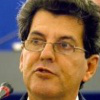

In [12]:
image.show()

In [13]:
results

[{'box': [23, 14, 57, 77],
  'confidence': 0.9994707703590393,
  'keypoints': {'left_eye': (37, 41),
   'right_eye': (63, 45),
   'nose': (45, 55),
   'mouth_left': (33, 71),
   'mouth_right': (55, 74)}}]